
# WWVGG19-Test







In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext watermark
%watermark

2021-10-12T13:21:43-07:00

CPython 3.8.5
IPython 7.18.1

compiler   : Clang 10.0.0 
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 12
interpreter: 64bit


### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import logging

import weightwatcher as ww
import torchvision.models as models

logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.WARNING)

ww.__version__

'0.5.4'

###  How to create a WWLayerIterator

In [4]:
modelname = 'VGG19'
model = models.vgg19(pretrained=True)
watcher = ww.WeightWatcher(model=model)

#### IDK why the ints are floats

In [5]:
details =  watcher.describe(model=model)
details

,layer_id,name,M,N,layer_type,num_evals,rf
0,2,None,3.0,64.0,LAYER_TYPE.CONV2D,27.0,9.0
1,4,None,64.0,64.0,LAYER_TYPE.CONV2D,576.0,9.0
2,7,None,64.0,128.0,LAYER_TYPE.CONV2D,576.0,9.0
3,9,None,128.0,128.0,LAYER_TYPE.CONV2D,1152.0,9.0
4,12,None,128.0,256.0,LAYER_TYPE.CONV2D,1152.0,9.0
5,14,None,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
6,16,None,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
7,18,None,256.0,256.0,LAYER_TYPE.CONV2D,2304.0,9.0
8,21,None,256.0,512.0,LAYER_TYPE.CONV2D,2304.0,9.0
9,23,None,512.0,512.0,LAYER_TYPE.CONV2D,4608.0,9.0


Assuming nested distributions


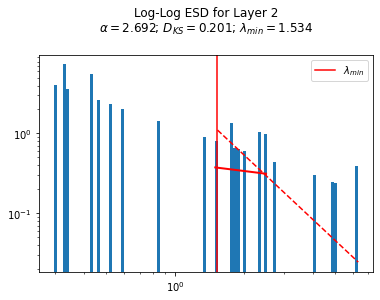

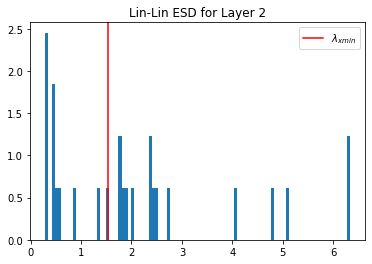

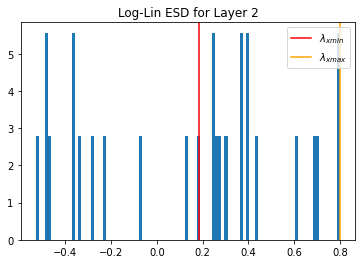

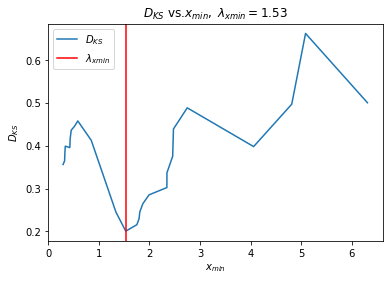

<Figure size 432x288 with 0 Axes>

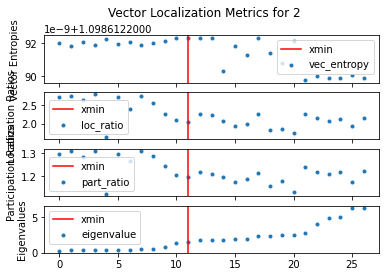

<Figure size 432x288 with 0 Axes>

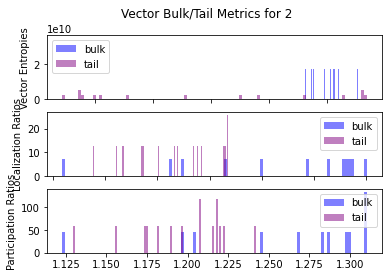

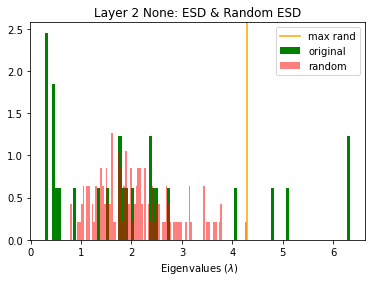

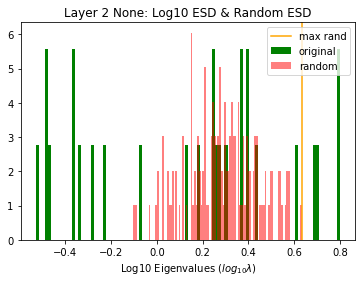

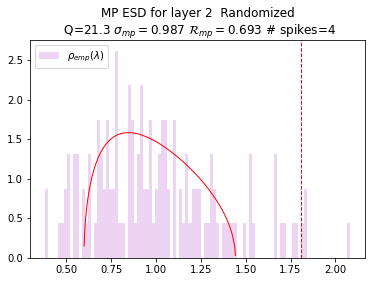

Assuming nested distributions


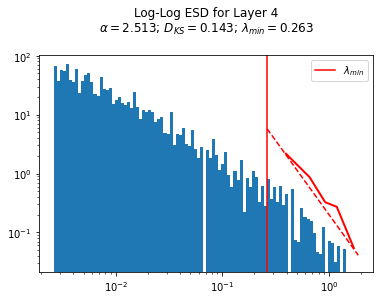

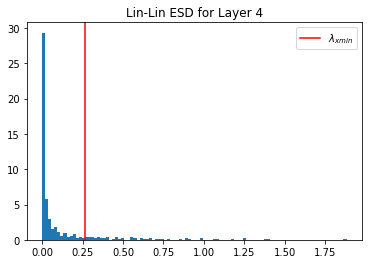

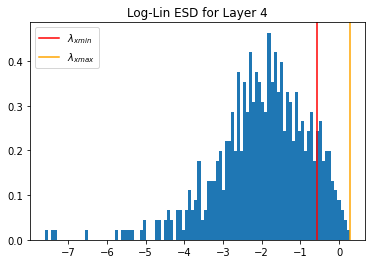

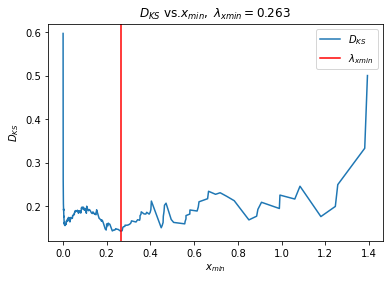

<Figure size 432x288 with 0 Axes>

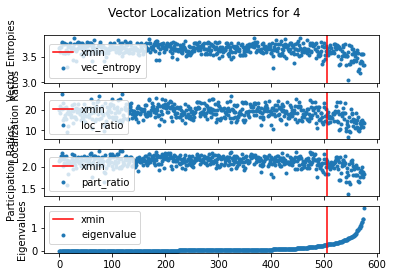

<Figure size 432x288 with 0 Axes>

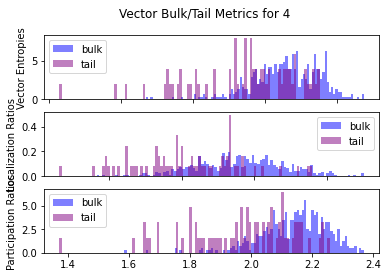

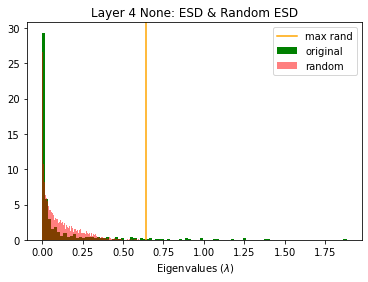

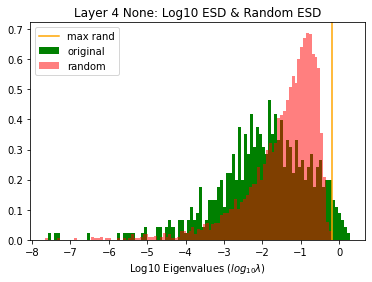

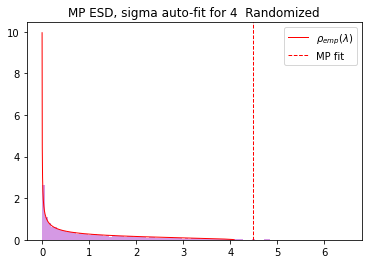

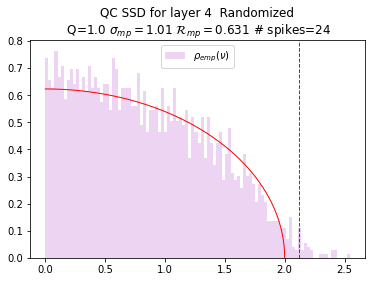

Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


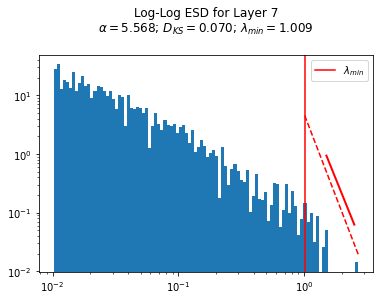

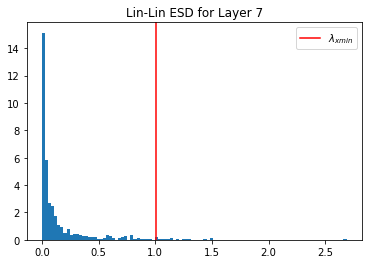

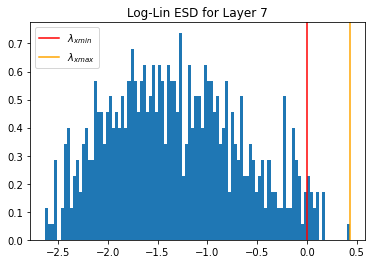

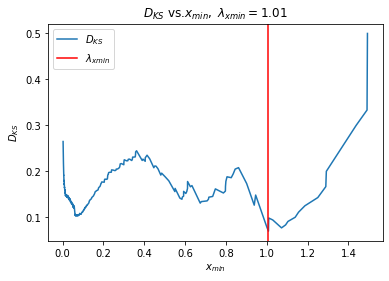

<Figure size 432x288 with 0 Axes>

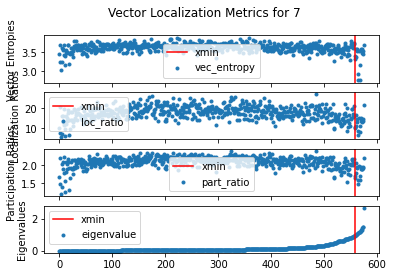

<Figure size 432x288 with 0 Axes>

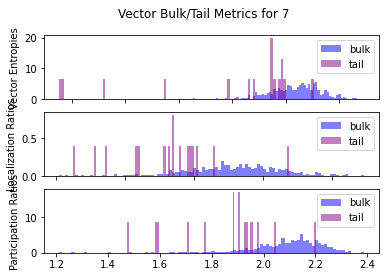

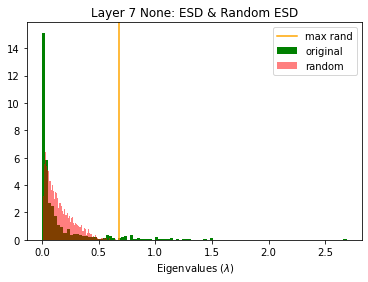

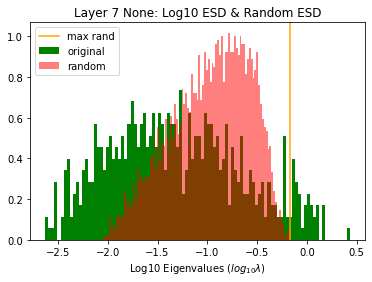

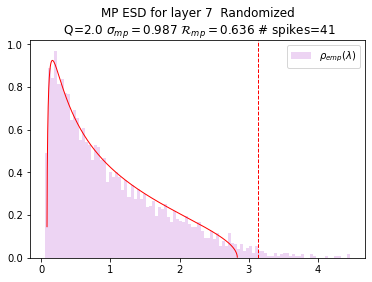

Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


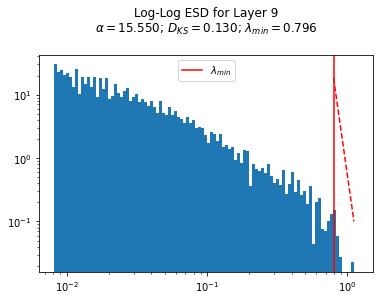

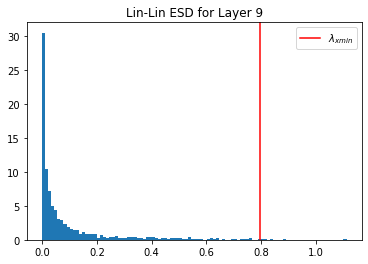

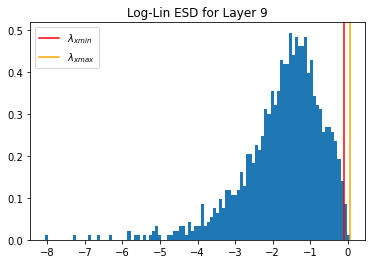

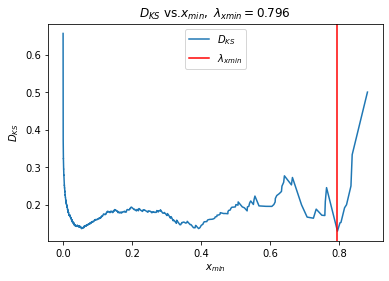

<Figure size 432x288 with 0 Axes>

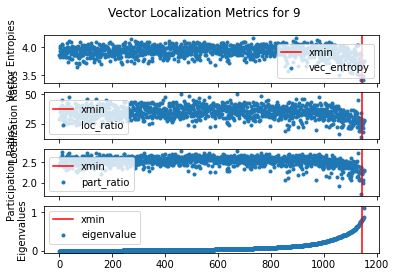

<Figure size 432x288 with 0 Axes>

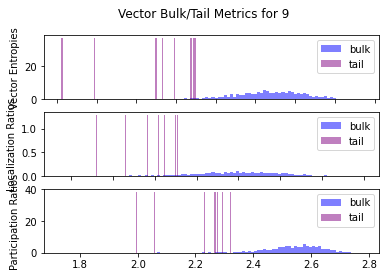

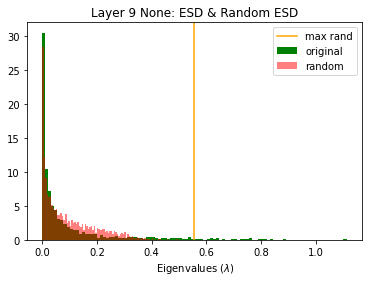

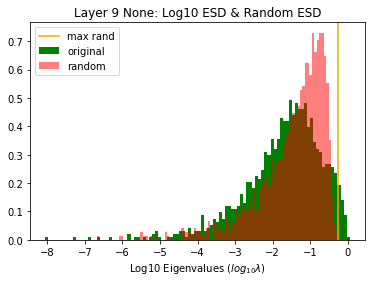

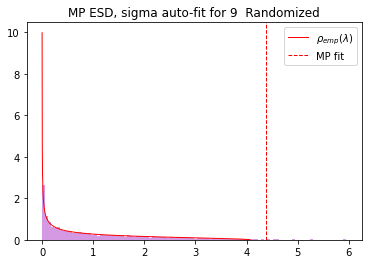

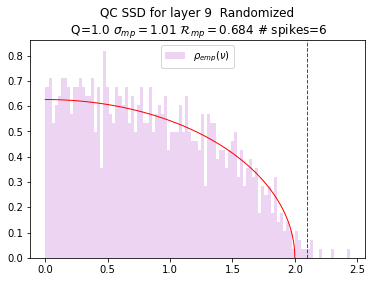

Assuming nested distributions


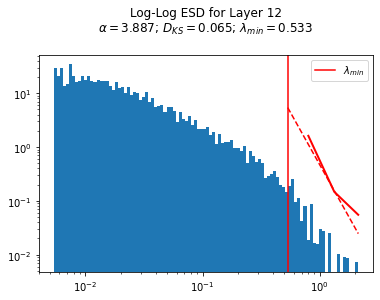

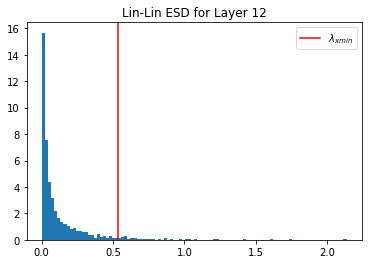

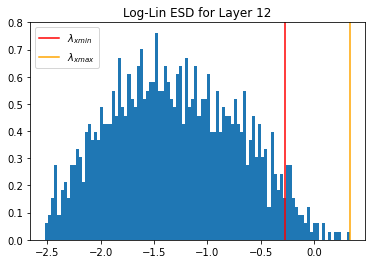

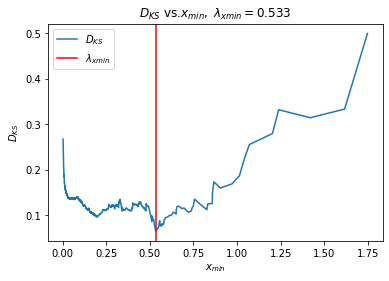

<Figure size 432x288 with 0 Axes>

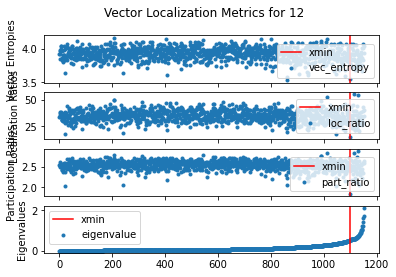

<Figure size 432x288 with 0 Axes>

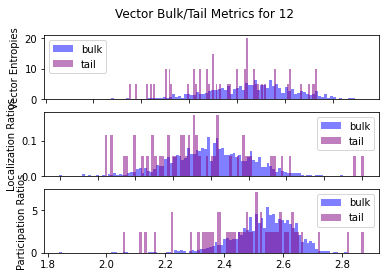

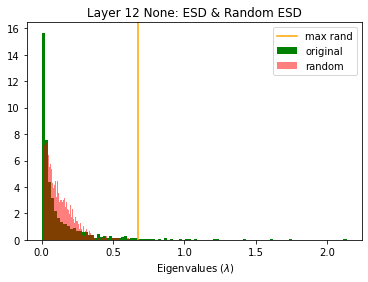

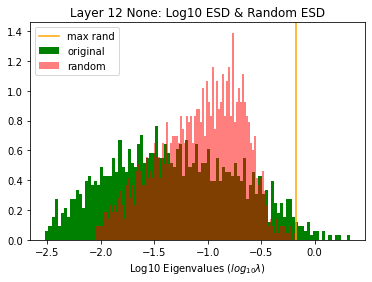

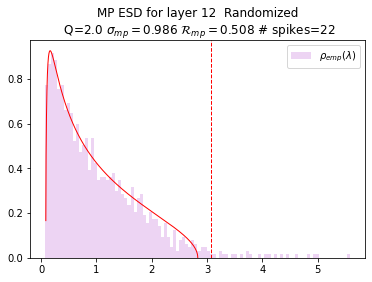

Assuming nested distributions


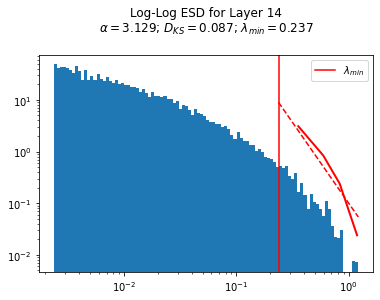

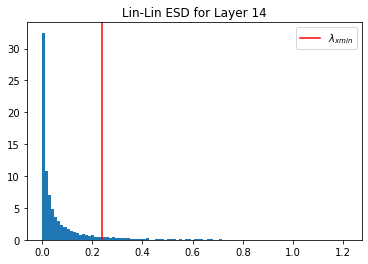

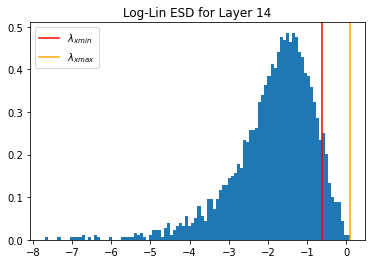

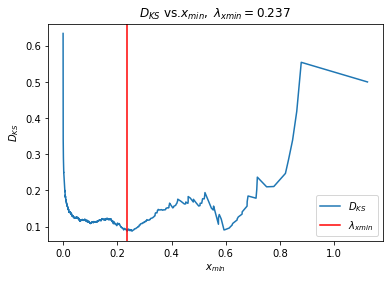

<Figure size 432x288 with 0 Axes>

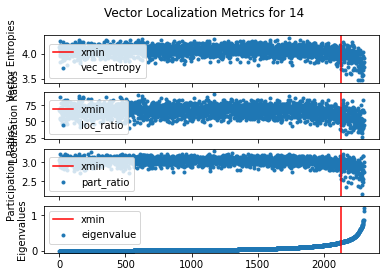

<Figure size 432x288 with 0 Axes>

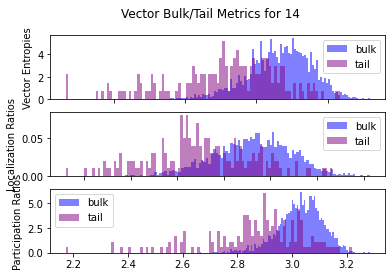

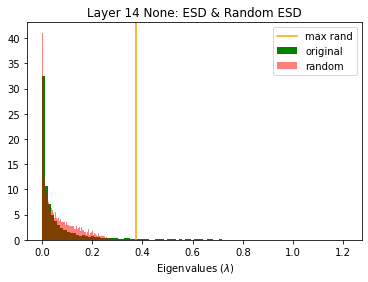

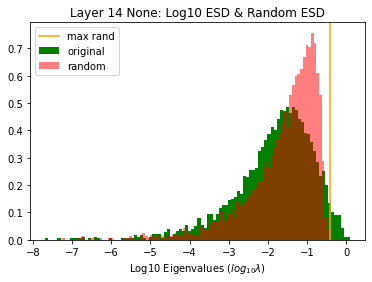

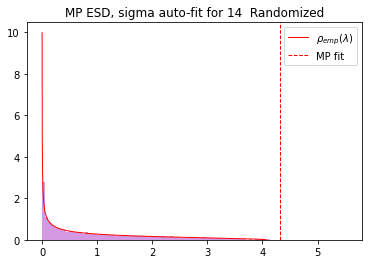

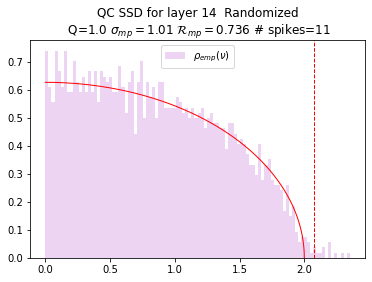

Assuming nested distributions


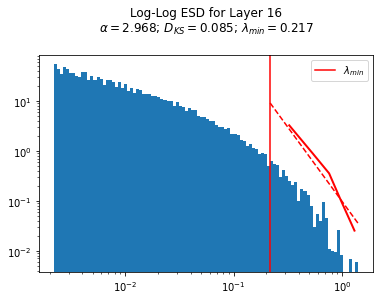

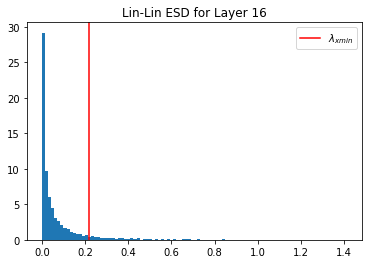

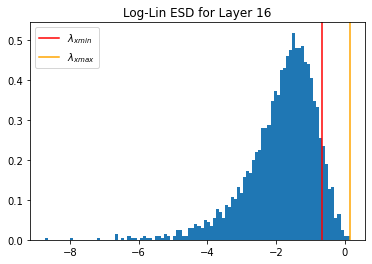

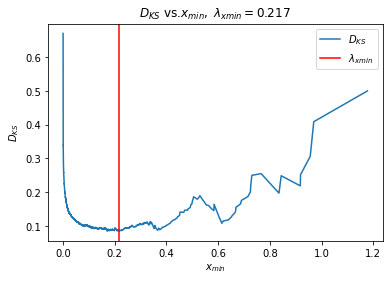

<Figure size 432x288 with 0 Axes>

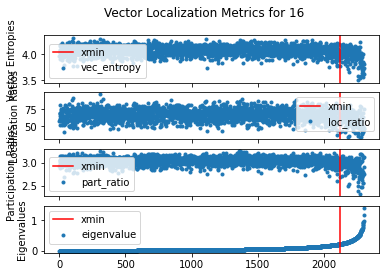

<Figure size 432x288 with 0 Axes>

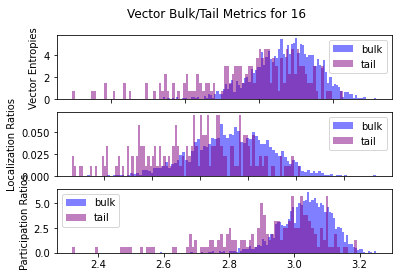

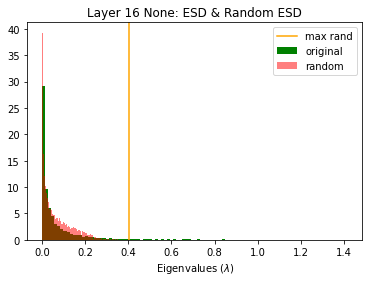

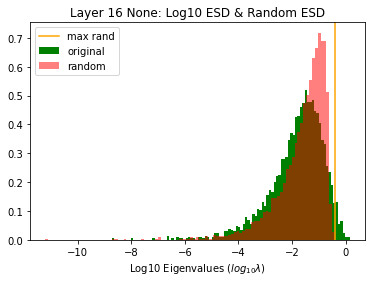

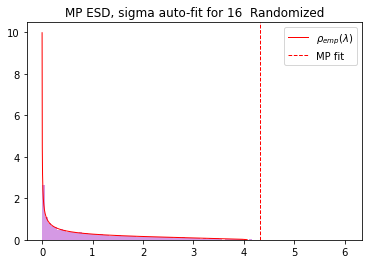

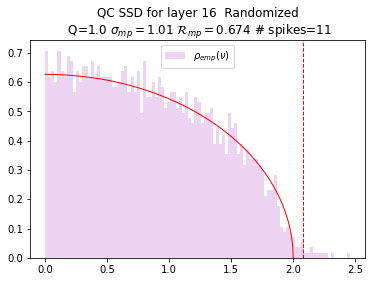

Assuming nested distributions


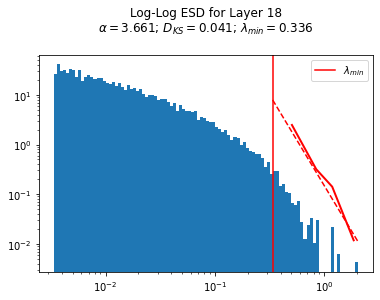

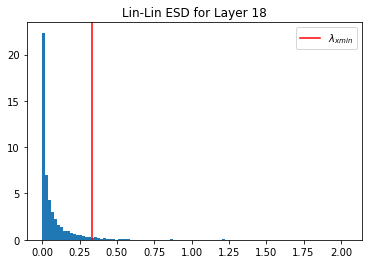

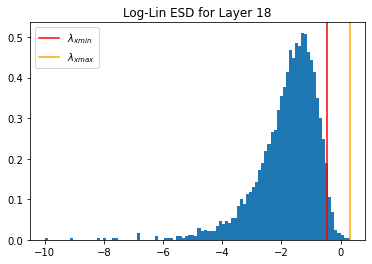

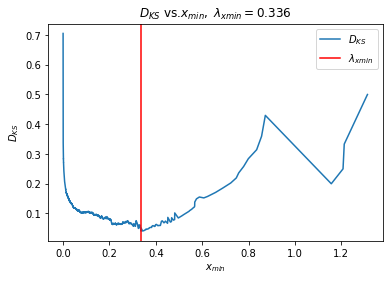

<Figure size 432x288 with 0 Axes>

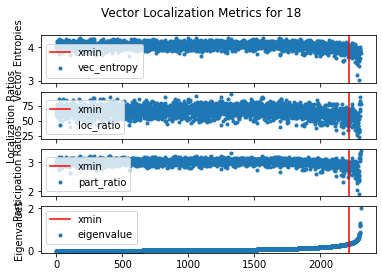

<Figure size 432x288 with 0 Axes>

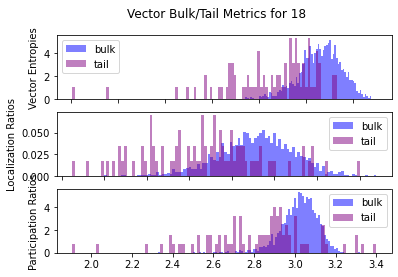

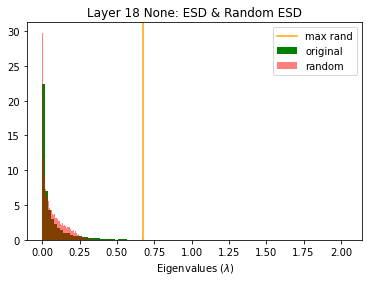

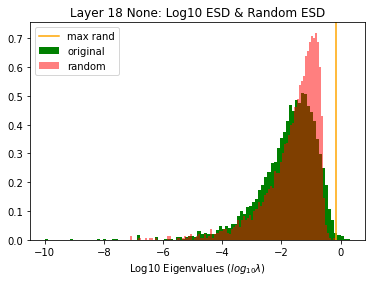

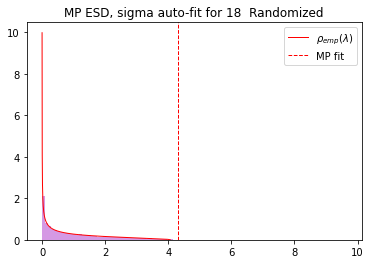

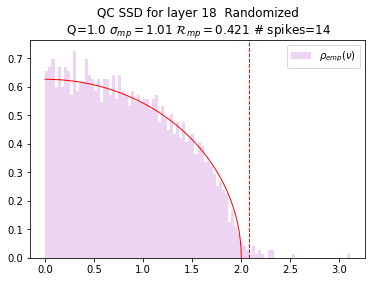

Assuming nested distributions


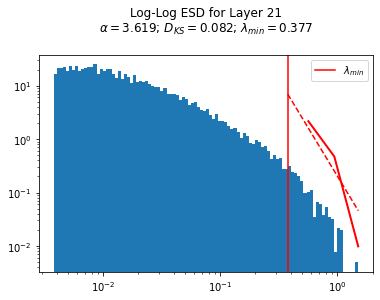

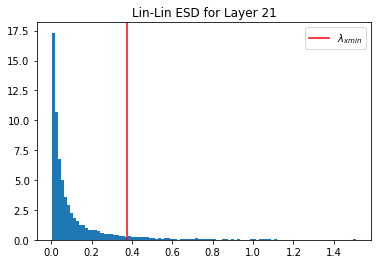

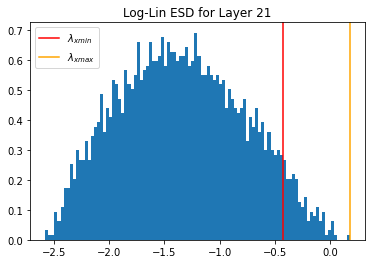

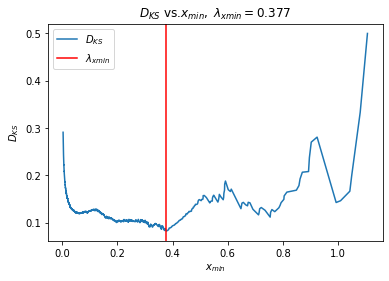

<Figure size 432x288 with 0 Axes>

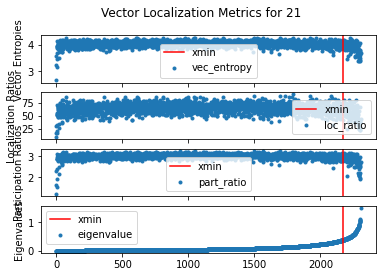

<Figure size 432x288 with 0 Axes>

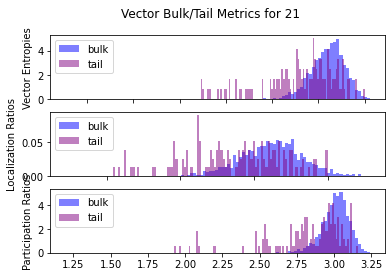

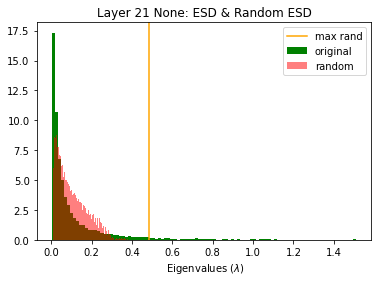

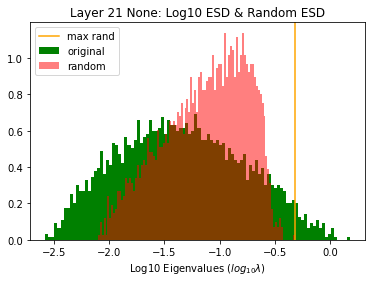

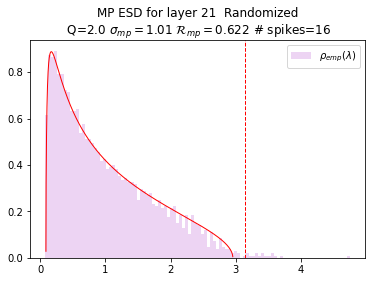

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [6]:
details =  watcher.analyze(model=model, plot=True, randomize=True)
details

In [ ]:
details.rand_distance.hist(bins=50)
plt.title("{}:   distance(X, rand(X))".format(modelname))

In [ ]:
details[['alpha', 'rand_distance']].plot.scatter(x='alpha', y='rand_distance')
plt.title("{}: alpha vs Dist(X,rand(X))".format(modelname))

In [ ]:
da = details[details.alpha<5]
da[['alpha', 'rand_distance']].plot.scatter(x='alpha', y='rand_distance')
plt.title("{}: Alpha vs Dist(X,rand(X)), alpha < 5".format(modelname))

In [ ]:
details

In [ ]:
plt.hist(details.alpha, bins=30);
plt.title("{} default".format(modelname))
plt.xlabel("alpha")

In [7]:
import powerlaw

def plot_loghist(x, bins, xmin):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, density=True)

    if xmin:
        plt.axvline(xmin, color='r', label=r'$\lambda_{min}$')

    plt.xscale('log')


Calculating best minimal value for power law fit


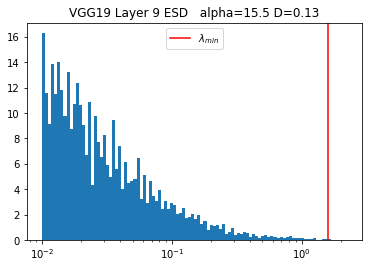

In [22]:
layer_id = 9
esd = watcher.get_ESD(layer=layer_id)
esd = esd[esd>0.01]
results = powerlaw.Fit(esd, xmax=np.max(esd))
plot_loghist(esd, bins=100, xmin=results.xmin);
title = "{} Layer {} ESD".format(modelname, layer_id)
title += "   alpha={:0.3} D={:0.3}".format(results.alpha, results.D)
plt.title(title)
plt.legend()

  0%|          | 0/441 [00:00<?, ?it/s]Calculating best minimal value for power law fit
Assuming nested distributions
  0%|          | 1/441 [00:02<18:07,  2.47s/it]Calculating best minimal value for power law fit
Assuming nested distributions
  0%|          | 2/441 [00:04<18:06,  2.47s/it]Calculating best minimal value for power law fit
Assuming nested distributions
  0%|          | 2/441 [00:07<27:51,  3.81s/it]

2 1.887176475026711 0.14655780126237317 7.716794687711722 0.0


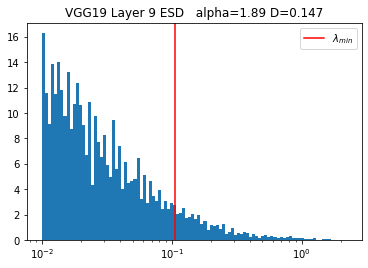

In [23]:
N = int(len(esd)/2)
for idx in tqdm(range(0,N,1)):
    if idx == 0:
        xmax = np.max(esd)
    else:
        xmax = np.max(esd[-idx])
        
    results = powerlaw.Fit(esd, xmax=xmax)
    alpha, D = results.alpha, results.D
    # stop when distribtion becomes power law
    R, p = results.distribution_compare('truncated_power_law', 'power_law', normalized_ratio=True)
    if R > 0.0:
        print(idx, alpha, D, R,p)
        
        plot_loghist(esd, bins=100, xmin=results.xmin);
        title = "{} Layer {} ESD".format(modelname, layer_id)
        title += "   alpha={:0.3} D={:0.3}".format(results.alpha, results.D)
        plt.title(title)
        plt.legend()
        break
